In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the datset
df = pd.read_csv('../../00-data/titanic.csv')

In [5]:
#show the first 5 rows of the dataset
df.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 11)

In [7]:
df.columns

Index(['survived', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [30]:

df.duplicated().sum()

0

In [32]:
df.ticket.duplicated().sum()

210

In [8]:
#Data Dictionary:
# survived - survived or not (0  = did not survive, 1 = survived)
# p class ( 1= upper class, 2 = middle class, 3 = lower class)
# name (last name, first middel (maiden))
# gender (female, or male)
# age 
# sibsp	- number of siblings and spouses aboard the ship
# parch - number of parents or children aboard the ship
# ticket - ticket number
# fare - ticket price or fair (in what units? euro? pounds?)
# cabin - cabin number
# embarked - port of embarkation:
#       - C = cherbourg
#       - Q = Queenstown
#       - S = Southampton 

In [10]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   gender    891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [12]:
df.isna().sum()

survived      0
pclass        0
name          0
gender        0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [13]:
#how many passengers in each class
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

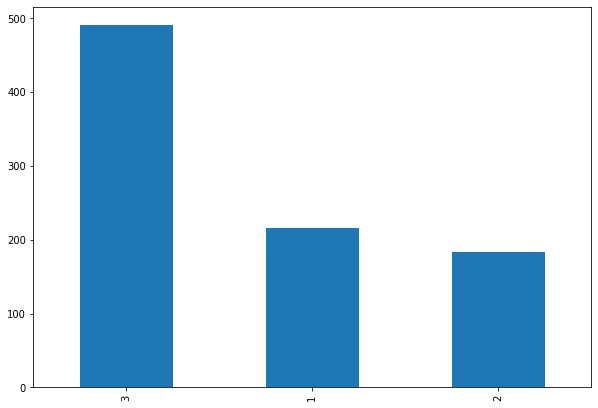

In [20]:
plt.figure(figsize = (10, 7))
df.pclass.value_counts().plot.bar();

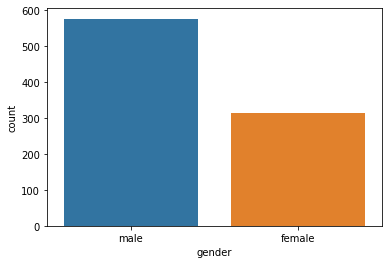

In [25]:
sns.countplot(x= 'gender' , data =df);


In [26]:
df.gender.value_counts()

male      577
female    314
Name: gender, dtype: int64

In [27]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

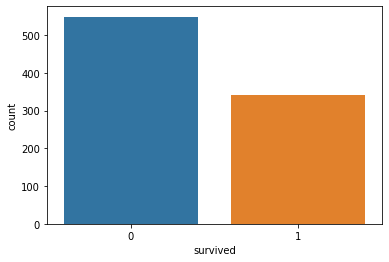

In [29]:
sns.countplot(x = "survived", data = df);

In [ ]:
#create a dictionary/list with key:value pair representing column:number of unique values in each column
# example [('gender', 2),
#           ('survived, 2), ... etc]

In [35]:
counts = df.nunique()
dict(counts)

{'survived': 2,
 'pclass': 3,
 'name': 891,
 'gender': 2,
 'age': 88,
 'sibsp': 7,
 'parch': 7,
 'ticket': 681,
 'fare': 248,
 'cabin': 147,
 'embarked': 3}

In [36]:
print(df.nunique(axis=0))

survived      2
pclass        3
name        891
gender        2
age          88
sibsp         7
parch         7
ticket      681
fare        248
cabin       147
embarked      3
dtype: int64


In [37]:
dictionary = {}
for column in df.columns:
	dictionary[column] = df[column].nunique()

dictionary

{'survived': 2,
 'pclass': 3,
 'name': 891,
 'gender': 2,
 'age': 88,
 'sibsp': 7,
 'parch': 7,
 'ticket': 681,
 'fare': 248,
 'cabin': 147,
 'embarked': 3}

In [38]:
[{col:len(df[col].unique())} for col in df.columns]

[{'survived': 2},
 {'pclass': 3},
 {'name': 891},
 {'gender': 2},
 {'age': 89},
 {'sibsp': 7},
 {'parch': 7},
 {'ticket': 681},
 {'fare': 248},
 {'cabin': 148},
 {'embarked': 4}]

In [ ]:
#for columns with number of unique values 7 or less:
# show the number of unique elements as well as a set of the unique values
# otherwise, only show th enumber of unique values
# example:
# survived 2 [0, 1]
# pclass 3 [1, 2, 3]
# ticket 681
# ... etc

In [39]:
df_dic = {}
for column in df.columns:
    key = column
    if df[column].nunique() <= 7:
        value = [df[column].nunique(),df[column].unique()]
    else:
        value = df[column].nunique()
    df_dic[key] = value

df_dic

{'survived': [2, array([0, 1])],
 'pclass': [3, array([3, 1, 2])],
 'name': 891,
 'gender': [2, array(['male', 'female'], dtype=object)],
 'age': 88,
 'sibsp': [7, array([1, 0, 3, 4, 2, 5, 8])],
 'parch': [7, array([0, 1, 2, 5, 3, 4, 6])],
 'ticket': 681,
 'fare': 248,
 'cabin': 147,
 'embarked': [3, array(['S', 'C', 'Q', nan], dtype=object)]}

In [41]:
for col in df:
    if df[col].nunique()< 7 :
        print(df[col].unique())

[0 1]
[3 1 2]
['male' 'female']
['S' 'C' 'Q' nan]


In [44]:
unique_count = {}
for column in df.columns:
  if df[column].unique().size <= 7:
    unique_count[column] = f"{df[column].unique().size} {df[column].unique()}"

unique_count

{'survived': '2 [0 1]',
 'pclass': '3 [3 1 2]',
 'gender': "2 ['male' 'female']",
 'sibsp': '7 [1 0 3 4 2 5 8]',
 'parch': '7 [0 1 2 5 3 4 6]',
 'embarked': "4 ['S' 'C' 'Q' nan]"}

In [46]:
df_dic = {}
for column in df.columns:
    key = column
    if df[column].nunique() <= 7:
        value = [df[column].nunique(),df[column].unique().tolist()]
    else:
        value = df[column].nunique()
    df_dic[key] = value

df_dic

{'survived': [2, [0, 1]],
 'pclass': [3, [3, 1, 2]],
 'name': 891,
 'gender': [2, ['male', 'female']],
 'age': 88,
 'sibsp': [7, [1, 0, 3, 4, 2, 5, 8]],
 'parch': [7, [0, 1, 2, 5, 3, 4, 6]],
 'ticket': 681,
 'fare': 248,
 'cabin': 147,
 'embarked': [3, ['S', 'C', 'Q', nan]]}

In [50]:
# for i in df.columns:
#     unq=df[i].unique()
#     print(df[i].name+" "+str(len(unq)))
#     print(list(df[i].unique()))

In [55]:
df.isnull().sum()

survived      0
pclass        0
name          0
gender        0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

## Missing Values

- Find the true values. Go back to the source and try to get the full data. Do some research.
- Impute missing values (fill them in):
        - fill in with the statistical mean or median
        - run a linear regression < talk about this in ML weeks 
- Anything less than 10% of your data, you can drop
- Check where the majority of the missing values are in. Example: column with 80% missing values
- observations with 80% missing values (i.e. null values in most of the features.)
- ignore them (be very clear to note this in your analysis)

In [57]:
# impute the average based on the pclass
# impute 
df.groupby('pclass')['fare'].mean()


pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [58]:
df.groupby('cabin')['fare'].mean()

cabin
A10    40.125000
A14    52.000000
A16    39.600000
A19    26.000000
A20    56.929200
         ...    
F33    11.333333
F38     7.750000
F4     39.000000
G6     13.581250
T      35.500000
Name: fare, Length: 147, dtype: float64

In [59]:
df.drop('cabin', axis=1, inplace=True)

In [60]:
df

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [61]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [63]:
df['embarked'].fillna('S', inplace=True)

In [64]:
df.isnull().sum()

survived      0
pclass        0
name          0
gender        0
age         177
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
dtype: int64

In [65]:
df.age.mean()

29.69911764705882

In [ ]:
#df['age'].fillna(df.age.mean())

# Try to fill the null values in the age column with the mean grouped by gender
# for gender == female, fillna with the age.mean for female passengers